In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# import Datasets
data = pd.read_csv('./house.csv')

In [5]:
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [6]:
# head Data
head_data = data.head()
head_data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [7]:
# tail data
tail_data = data.tail()
tail_data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


In [8]:
# data shape
data.shape

(5000, 7)

In [9]:
# description of data
description = data.describe()
description

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


## Insights
 - The Average Income, House Age, No.of Rooms, No of BeadRooms and population will be 68583.108984, 5.977222, 6.987792, 3.981330, 36163.516039 so the average price will be 1232072.
 - The Minimum Income, House Age, No.of Rooms, No of BeadRooms and population will be 17796.631190, 2.644304, 3.236194, 2.000000, 172.610686 so the minimum will be 15938
 - The Maximum Income, House Age, No.of Rooms, No of BeadRooms and population will be 107701.748378, 9.519088, 10.759588, 6.500000, 69621.713378 so the minimum will be 2469065



In [10]:
# columns
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

## EDA
- ploting the graph or charts for the datasets

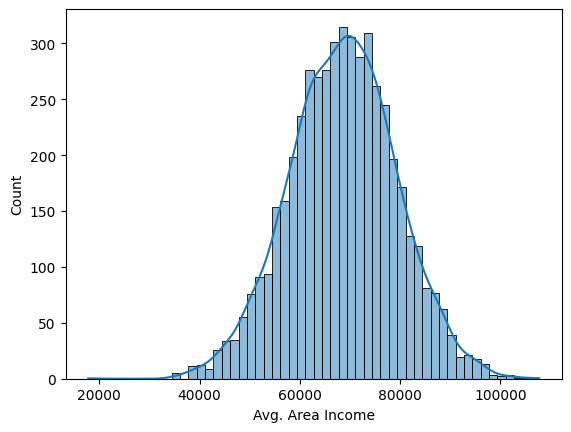

In [11]:
# Plot for the Income
sns.histplot(data=data, x='Avg. Area Income', kde=True)
plt.show()

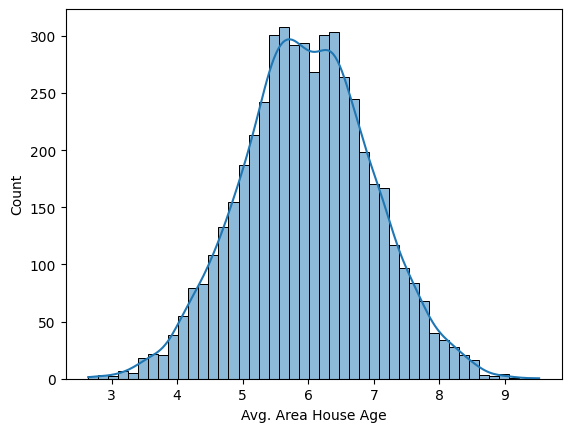

In [12]:
# Plot for the House Age
sns.histplot(data=data, x='Avg. Area House Age', kde=True)
plt.show()

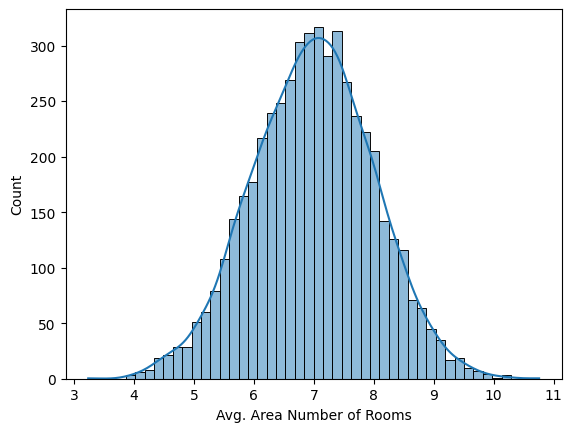

In [13]:
# plot for Avg. Area Number of Rooms
sns.histplot(data=data, x='Avg. Area Number of Rooms', kde=True)
plt.show()

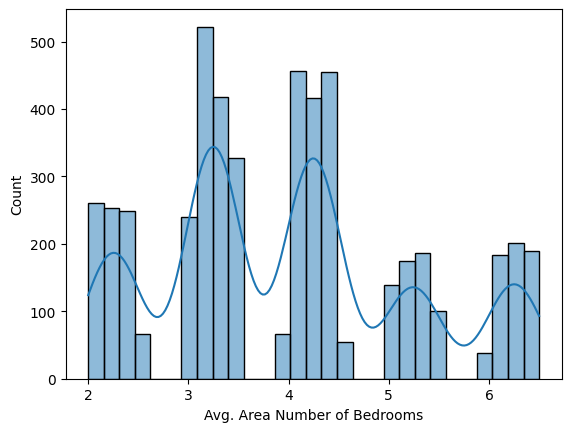

In [14]:
# plot for Avg. Area Number of Bedrooms
sns.histplot(data=data, x='Avg. Area Number of Bedrooms', kde=True)
plt.show()

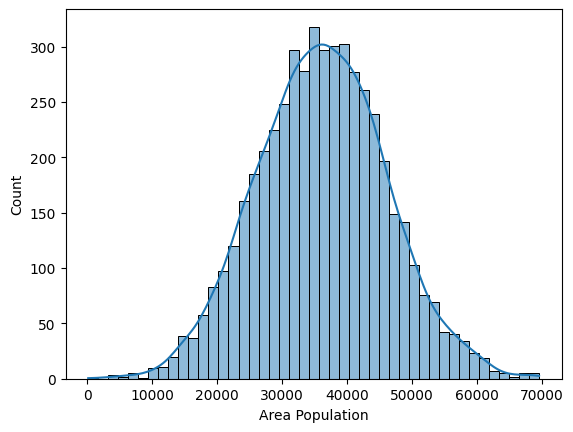

In [15]:
# plot for Area Population
sns.histplot(data=data, x='Area Population', kde=True)
plt.show()

## Bivariate Analysis

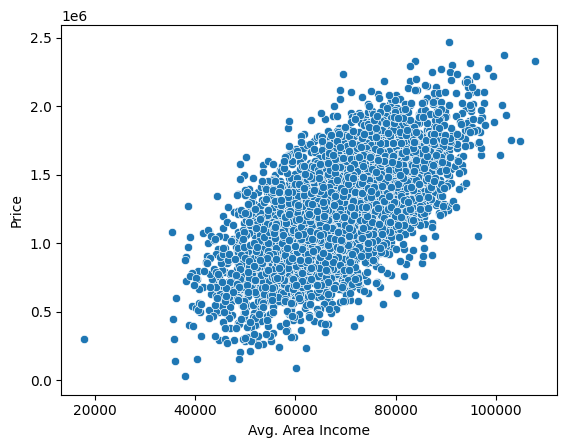

In [16]:
sns.scatterplot(data=data, x='Avg. Area Income', y='Price')
plt.show()

## Insights
 - There is a positive relationship between the Avg. Area Income and Prices, so the Average Area Income increases so the Prices also increases

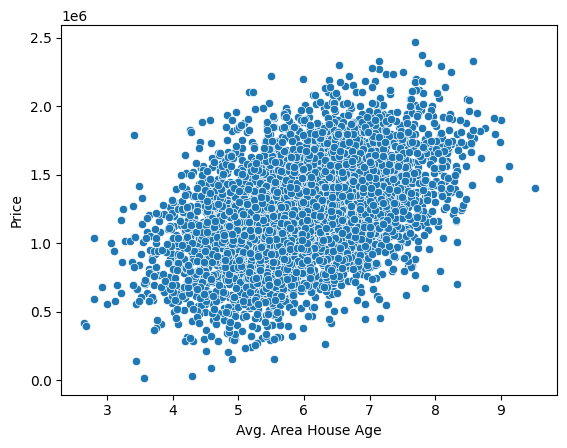

In [17]:
sns.scatterplot(data=data, x='Avg. Area House Age', y='Price')
plt.show()

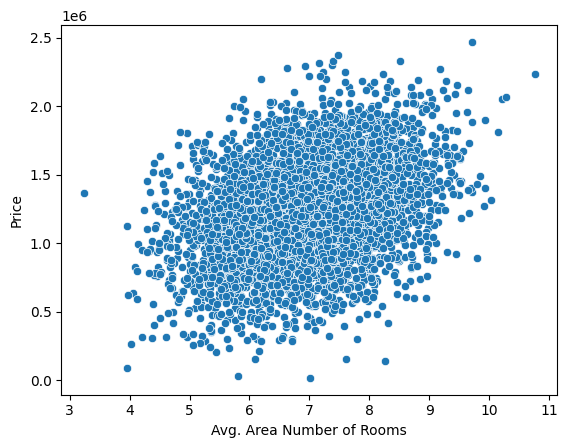

In [18]:
sns.scatterplot(data=data, x='Avg. Area Number of Rooms', y='Price')
plt.show()

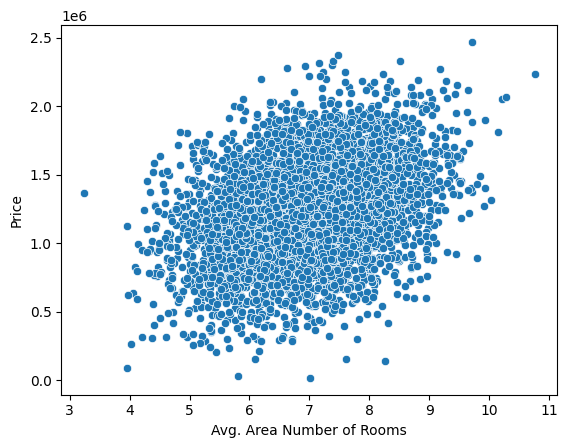

In [19]:
sns.scatterplot(data=data, x='Avg. Area Number of Rooms', y='Price')
plt.show()

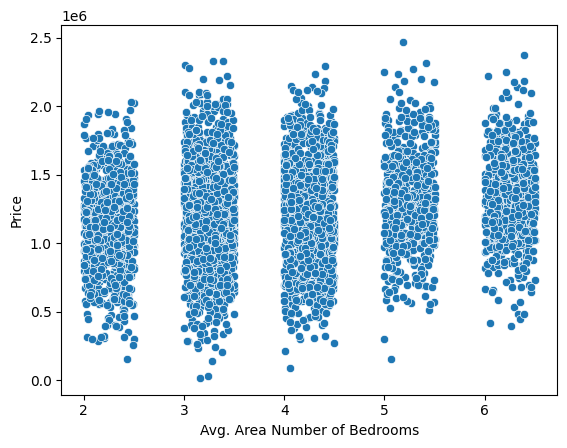

In [20]:
sns.scatterplot(data=data, x='Avg. Area Number of Bedrooms', y='Price')
plt.show()

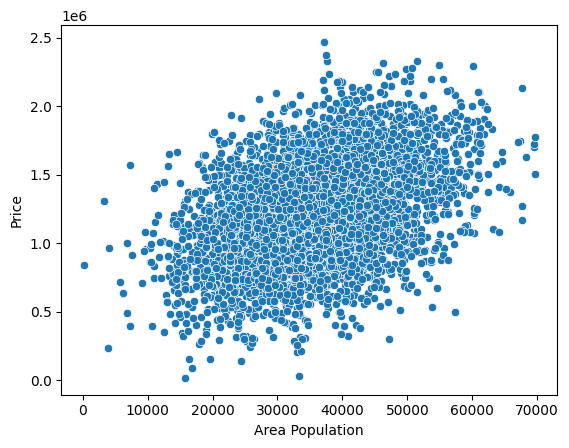

In [21]:
sns.scatterplot(data=data, x='Area Population', y='Price')
plt.show()

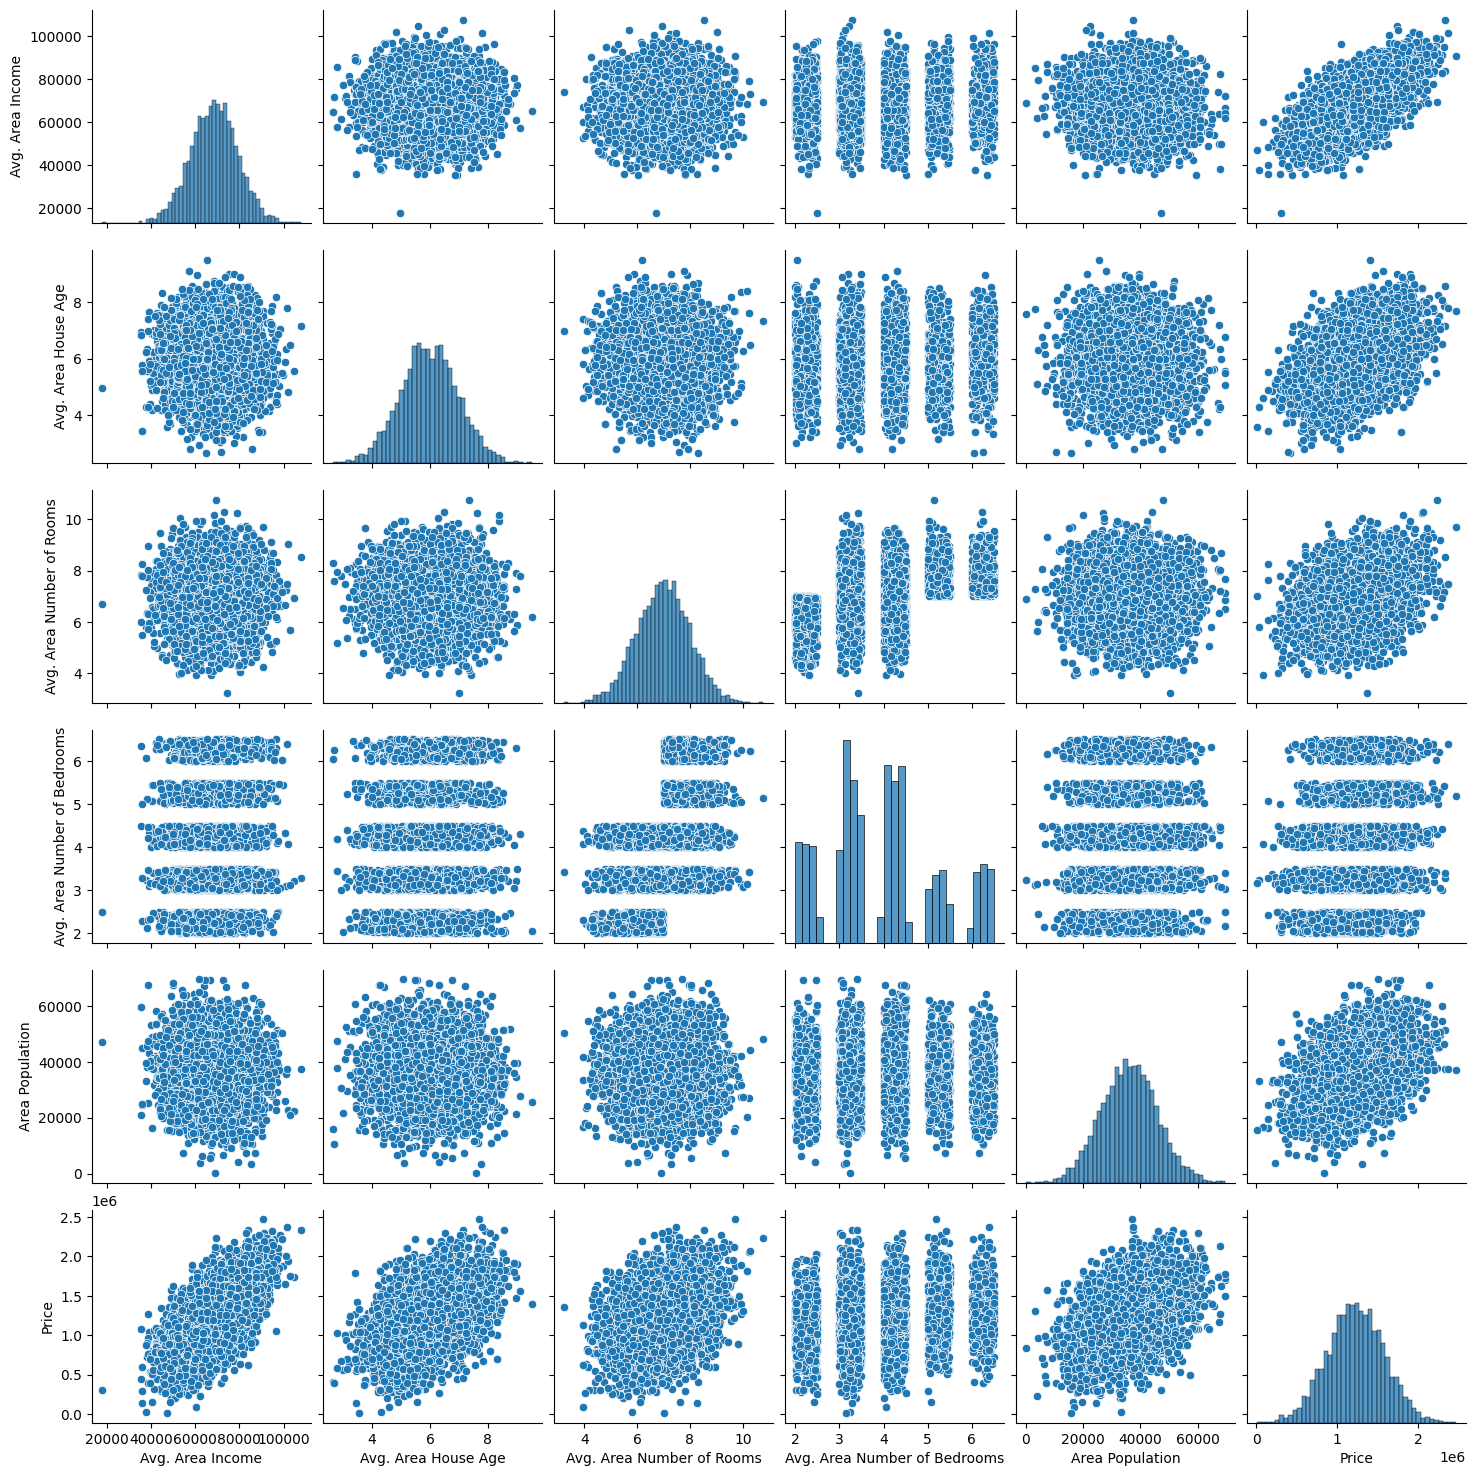

In [22]:
sns.pairplot (data = data)

In [23]:
# Data PerProcessing
data.drop('Address', axis=1, inplace=True)

In [24]:
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [25]:
# Future Selections
data.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


# Splitting Data

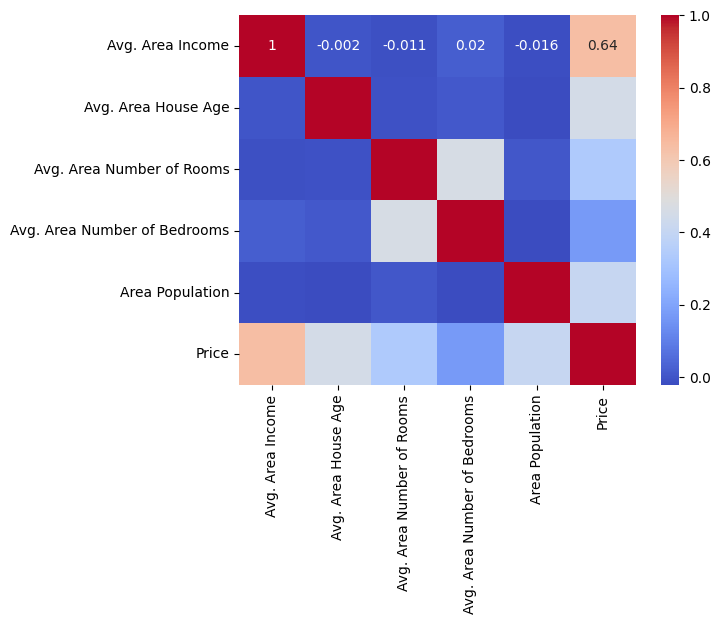

In [26]:
# ploting heatmap
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [27]:
# Splitting starts
X = data.iloc[:, :-1]
Y = data.Price

In [28]:
# traning dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=40)

In [29]:
# Modal Implementation
LR_Modal = LinearRegression()

In [30]:
'''
    Train the dataset using Leniear Regression 
'''
LR_Modal.fit(x_train, y_train)

LinearRegression()

In [31]:
# Test the dataset
y_pred = LR_Modal.predict(x_test)

In [32]:
print(y_pred, "prediction")
print(y_test, "Y test")

[1439461.75221702 1545360.5492265  1712986.21933872 1081215.17326021
 1281982.12896013  683992.65569541 1163616.47073076 1307105.33487951
 1553131.02821079 1361019.94677931 1393675.92724517 1228964.16816537
 1092152.7994427   504278.67351724 1253590.68954527 1773631.91383928
 1570528.02649251 1548708.38513383  960689.85758868 1027024.62312301
  658872.73426711  737440.6646086   947076.12177     603085.69215932
 1579470.56971735 1772518.49328452 1433207.73352377 1459621.69347602
 1095484.0281549  1821826.14190669 1601441.87836441 1212957.80557395
  736191.06404232 1077030.05785894  779709.17805986  927017.32204808
 1336293.09118004 1503311.59451871  807023.70438147  617217.16507284
  903928.36582841  997310.16330395 1198693.14842491 1252565.47878852
 1817090.80106209 1329724.2124113  1049811.62403667  859698.88897989
 1148261.51688749 1441734.17525459  886474.98308488  877124.08984138
 1027988.25816815 1051114.75531929  836759.31482417 1311392.79016853
 1256848.81109925 1032041.01652707

In [33]:
# Modal Evolution
print("R2 Score: ", r2_score(y_test, y_pred))

print("Mean Squared error", mean_squared_error(y_test, y_pred))

print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

print(x_test.shape, "test data shape")

R2 Score:  0.9177155387530191
Mean Squared error 10067952299.94393
Mean Absolute Error:  80371.02459113197
(500, 5) test data shape


In [34]:
## Asjusted R2 Score
adjuested_R2_Score = 1 - (1 - 0.91) * (500 - 1) / (500 - 5 - 1)
'''
    1 - (1 - r2Score) * (no of rows - 1) / (no of rows - no of columns - 1)
'''
print(adjuested_R2_Score, "Adjusted R2 Score")

0.909089068825911 Adjusted R2 Score
